In [4]:
# KNN Classifier - Breast Cancer 
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score,classification_report 
breast_cancer = pd.read_csv("Breast_Cancer_Wisconsin.csv") 

        id  clump_thickness  size_uniformity  shape_uniformity  \
0  1000025                5                1                 1   
1  1002945                5                4                 4   
2  1015425                3                1                 1   
3  1016277                6                8                 8   
4  1017023                4                1                 1   

   marginal_adhesion  epithelial_size bare_nucleoli  bland_chromatin  \
0                  1                2             1                3   
1                  5                7            10                3   
2                  1                2             2                3   
3                  1                3             4                3   
4                  3                2             1                3   

   normal_nucleoli  mitoses  class  
0                1        1      2  
1                2        1      2  
2                1        1      2  
3                7    

C:\Anaconda3\envs\tensorflow2\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)



K-Nearest Neighbors - Train Classification Report
              precision    recall  f1-score   support

          0       0.96      0.98      0.97       315
          1       0.97      0.93      0.95       174

avg / total       0.96      0.96      0.96       489



K-Nearest Neighbors - Test Confusion Matrix

 Predicted    0   1
Actuall           
0          141   2
1            6  61

K-Nearest Neighbors - Test accuracy: 0.962

K-Nearest Neighbors - Test Classification Report
              precision    recall  f1-score   support

          0       0.96      0.99      0.97       143
          1       0.97      0.91      0.94        67

avg / total       0.96      0.96      0.96       210


K-value 5

K-Nearest Neighbors - Train Confusion Matrix

 Predicted    0    1
Actuall            
0          306    9
1            7  167

K-Nearest Neighbors - Train accuracy: 0.967

K-Nearest Neighbors - Train Classification Report
              precision    recall  f1-score   support

         

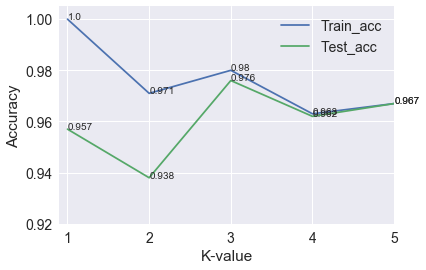

In [8]:
# KNN CLassifier - Breast Cancer
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,classification_report

breast_cancer = pd.read_csv("Breast_Cancer_Wisconsin.csv")

print (breast_cancer.head())

breast_cancer['bare_nucleoli'] = breast_cancer['bare_nucleoli'].replace('?', np.NAN)
breast_cancer['bare_nucleoli'] = breast_cancer['bare_nucleoli'].fillna(breast_cancer['bare_nucleoli'].value_counts().index[0])

breast_cancer['Cancer_Ind'] = 0
breast_cancer.loc[breast_cancer['class']==4,'Cancer_Ind'] = 1

x_vars = breast_cancer.drop(['id','class','Cancer_Ind'],axis=1)
y_var = breast_cancer['Cancer_Ind']


from sklearn.preprocessing import StandardScaler
x_vars_stdscle = StandardScaler().fit_transform(x_vars.values)
from sklearn.model_selection import train_test_split
x_vars_stdscle_df = pd.DataFrame(x_vars_stdscle, index=x_vars.index, columns=x_vars.columns)
x_train,x_test,y_train,y_test = train_test_split(x_vars_stdscle_df,y_var,train_size = 0.7,random_state=42)

from sklearn.neighbors import KNeighborsClassifier
knn_fit = KNeighborsClassifier(n_neighbors=3,p=2,metric='minkowski')
knn_fit.fit(x_train,y_train)

print ("\nK-Nearest Neighbors - Train Confusion Matrix\n\n",pd.crosstab(y_train,knn_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]) )     
print ("\nK-Nearest Neighbors - Train accuracy:",round(accuracy_score(y_train,knn_fit.predict(x_train)),3))
print ("\nK-Nearest Neighbors - Train Classification Report\n",classification_report(y_train,knn_fit.predict(x_train)))

print ("\n\nK-Nearest Neighbors - Test Confusion Matrix\n\n",pd.crosstab(y_test,knn_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nK-Nearest Neighbors - Test accuracy:",round(accuracy_score(y_test,knn_fit.predict(x_test)),3))
print ("\nK-Nearest Neighbors - Test Classification Report\n",classification_report(y_test,knn_fit.predict(x_test)))


# Tuning of K- value for Train & Test data
dummyarray = np.empty((5,3))
k_valchart = pd.DataFrame(dummyarray)
k_valchart.columns = ["K_value","Train_acc","Test_acc"]

k_vals = [1,2,3,4,5]
for i in range(len(k_vals)):
    knn_fit = KNeighborsClassifier(n_neighbors=k_vals[i],p=2,metric='minkowski')
    knn_fit.fit(x_train,y_train)

    print ("\nK-value",k_vals[i])
    
    tr_accscore = round(accuracy_score(y_train,knn_fit.predict(x_train)),3)
    print ("\nK-Nearest Neighbors - Train Confusion Matrix\n\n",pd.crosstab(y_train,knn_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]) )     
    print ("\nK-Nearest Neighbors - Train accuracy:",tr_accscore)
    print ("\nK-Nearest Neighbors - Train Classification Report\n",classification_report(y_train,knn_fit.predict(x_train)))

    ts_accscore = round(accuracy_score(y_test,knn_fit.predict(x_test)),3)    
    print ("\n\nK-Nearest Neighbors - Test Confusion Matrix\n\n",pd.crosstab(y_test,knn_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))      
    print ("\nK-Nearest Neighbors - Test accuracy:",ts_accscore)
    print ("\nK-Nearest Neighbors - Test Classification Report\n",classification_report(y_test,knn_fit.predict(x_test)))
    
#     from sklearn import metrics 
#     import seaborn as sn 
#     import pandas as pd 
#     import matplotlib.pyplot as plt 
#     %matplotlib inline 
    
#     #pred = knn_fit.predict(x_test)
#     array = metrics.confusion_matrix(y_test, knn_fit.predict(x_test)) 
#     df_cm = pd.DataFrame(array, ["Malignant","Benign"], ["Malignant","Benign"]) 
#     sn.set(font_scale=1.4)#for label size 
#     sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
    
    k_valchart.loc[i, 'K_value'] = k_vals[i]      
    k_valchart.loc[i, 'Train_acc'] = tr_accscore     
    k_valchart.loc[i, 'Test_acc'] = ts_accscore               


# Ploting accuracies over varied K-values
import matplotlib.pyplot as plt
plt.figure()
#plt.title('KNN Train & Test Accuracy change with K-value')

plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.plot(k_valchart["K_value"],k_valchart["Train_acc"])
plt.plot(k_valchart["K_value"],k_valchart["Test_acc"])

plt.axis([0.9,5, 0.92, 1.005])
plt.xticks([1,2,3,4,5])

for a,b in zip(k_valchart["K_value"],k_valchart["Train_acc"]):
    plt.text(a, b, str(b),fontsize=10)

for a,b in zip(k_valchart["K_value"],k_valchart["Test_acc"]):
    plt.text(a, b, str(b),fontsize=10)
    
plt.legend(loc='upper right')    

plt.show()


In [ ]:
from sklearn import metrics 
array = metrics.confusion_matrix(df_test["class"], predicted) 